In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Model

In [17]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

### Normalize data

In [18]:
X_train, X_test = X_train/255.0, X_test/255.0

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
y_train.shape

(60000,)

## Train

In [21]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [22]:
X_train.shape

(60000, 28, 28, 1)

In [24]:
# num of classes -> for output layer's number of neuron
K = len(set(y_train))
print(f'Number of classes: {K}')

Number of classes: 10


In [25]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

In [26]:
model = Model(i, x)

In [27]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)              

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
r = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.5412 - accuracy: 0.8014 - val_loss: 0.4005 - val_accuracy: 0.8497
Epoch 2/15
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3701 - accuracy: 0.8608 - val_loss: 0.3445 - val_accuracy: 0.8707
Epoch 3/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3195 - accuracy: 0.8804 - val_loss: 0.3171 - val_accuracy: 0.8807
Epoch 4/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2855 - accuracy: 0.8916 - val_loss: 0.3021 - val_accuracy: 0.8889
Epoch 5/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2614 - accuracy: 0.9025 - val_loss: 0.2914 - val_accuracy: 0.8903
Epoch 6/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2368 - accuracy: 0.9092 - val_loss: 0.2925 - val_accuracy: 0.8938
Epoch 7/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2180 - accuracy: 0.9174 - val_loss: 0.2921 -

### Model Evaluation

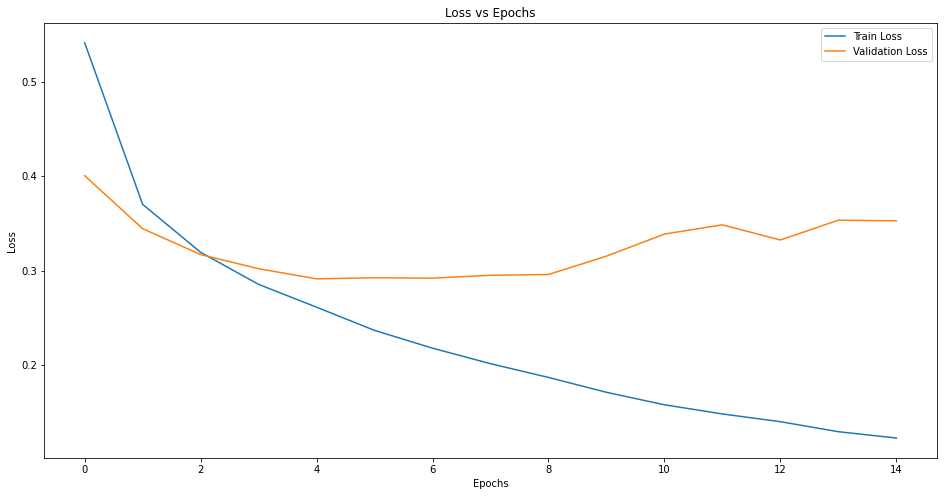

In [30]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

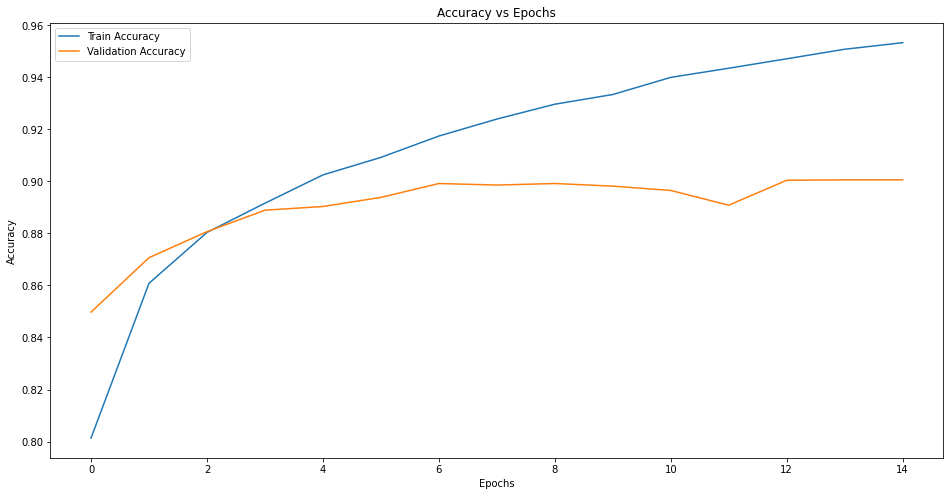

In [31]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

## Prediction on Test data

In [34]:
t_loss, t_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {t_loss}')
print(f'Test Accuracy: {t_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.3581 - accuracy: 0.9007
Test loss: 0.35814276337623596
Test Accuracy: 0.9006999731063843


### Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix

In [40]:
y_pred = model.predict(X_test).argmax(axis=1)

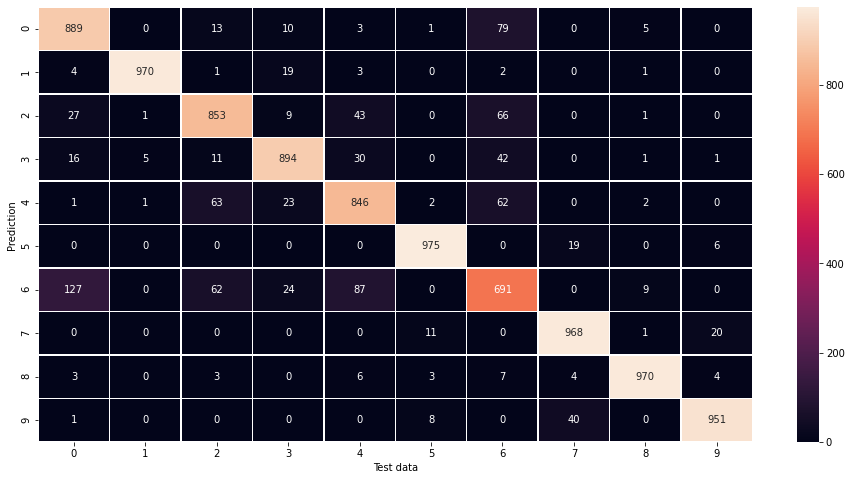

In [58]:
plt.figure(figsize=(16, 8))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=True, yticklabels=True, annot=True, fmt='d', linewidths=0.5)
plt.xlabel('Test data')
plt.ylabel('Prediction')
plt.show()